# Pulling Stock Data
Python notebook to pull stock data for D3 visualization: https://bl.ocks.org/mbostock/1256572

## Sourcing Data
Let's start by using [Quandl](https://www.quandl.com) for the stock data:

In [5]:
import quandl
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

Let's pull a single stock to explore the data format:

In [6]:
data = quandl.get("WIKI/AAPL", rows=5)

What format is the data?

In [7]:
print type(data)

<class 'pandas.core.frame.DataFrame'>


Let's peek at the structure of this dataframe

In [8]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-07-13,145.50,148.49,145.44,147.77,24922788.0,0.0,1.0,145.50,148.49,145.44,147.77,24922788.0
2017-07-14,147.97,149.33,147.33,149.04,19961788.0,0.0,1.0,147.97,149.33,147.33,149.04,19961788.0
2017-07-17,148.82,150.90,148.57,149.56,23243713.0,0.0,1.0,148.82,150.90,148.57,149.56,23243713.0
2017-07-18,149.20,150.13,148.67,150.08,17713795.0,0.0,1.0,149.20,150.13,148.67,150.08,17713795.0
2017-07-19,150.48,151.42,149.95,151.02,20615419.0,0.0,1.0,150.48,151.42,149.95,151.02,20615419.0


We are interested in monthly values of the `Adjusted Close` price which is the 11th column, so let's see if we can extract just that using `.11` from their [API documentation](https://docs.quandl.com/docs/time-series-2):

In [9]:
data = quandl.get("WIKI/AAPL.11", rows=5, collapse='monthly')
data

,Adj. Close
Date,
1980-12-31,0.503843
1981-01-31,0.417040
1981-02-28,0.391205
1981-03-31,0.361681
1981-04-30,0.418959


Great but we want to show the last 10 years:

In [10]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y-%m-01')
start_date

'2007-07-01'

In [11]:
data = quandl.get("WIKI/AAPL.11", rows=120, collapse='monthly', start_date=start_date)
data.head(5)

,Adj. Close
Date,
2007-07-31,17.001701
2007-08-31,17.868819
2007-09-30,19.803059
2007-10-31,24.510270
2007-11-30,23.512826


## Scrubbing Data

The data format we need for the D3.js showcase is:

```
symbol,date,price
MSFT,Jan 2000,39.81
MSFT,Feb 2000,36.35
MSFT,Mar 2000,43.22
MSFT,Apr 2000,28.37
MSFT,May 2000,25.45```

Let's choose a few symbols and pull the data we need:

In [12]:
symbols = ['WIKI/MSFT.11', 'WIKI/AAPL.11', 'WIKI/IBM.11', 'WIKI/GOOGL.11']
data = quandl.get(symbols, rows=120, collapse='monthly', start_date=start_date)

Let's rename the columns to just their symbol name by removing `WIKI/` and ` - Close` from each column name. We can iterate over the columns using the `for col in data.columns` syntax:

In [13]:
data.columns = [col.replace(' - Adj. Close','').replace('WIKI/','') for col in data.columns]
data.head(5)

,MSFT,AAPL,IBM,GOOGL
Date,,,,
2007-07-31,22.683715,17.001701,88.156667,255.789598
2007-08-31,22.559794,17.868819,93.297986,258.422726
2007-09-30,23.133015,19.803059,94.185472,284.513265
2007-10-31,28.904490,24.510270,92.842250,354.594600
2007-11-30,26.468107,23.512826,84.398142,347.572924


Before we scrub for D3, let's visualize in python and check it looks good:

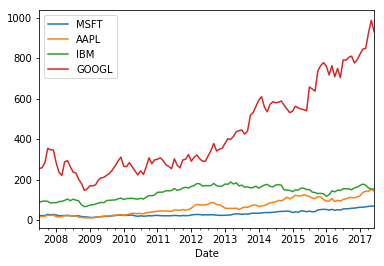

In [14]:
%matplotlib inline
ax = data.plot()

Now we can collapse the data:

In [15]:
datalist=data.unstack()
datalist.head(10)

      Date      
MSFT  2007-07-31    22.683715
      2007-08-31    22.559794
      2007-09-30    23.133015
      2007-10-31    28.904490
      2007-11-30    26.468107
      2007-12-31    28.043590
      2008-01-31    25.680366
      2008-02-29    21.510152
      2008-03-31    22.443395
      2008-04-30    22.554109
dtype: float64

Almost there! We just need the CSV format now:

In [16]:
csv = datalist.to_csv(header=True, index_label=['symbol','date','price'], date_format='%b %Y', index=True)
csv = csv.replace("price,0","price") # remove addition of ',0' on first line
print csv

symbol,date,price
MSFT,Jul 2007,22.6837151859
MSFT,Aug 2007,22.5597936872
MSFT,Sep 2007,23.1330150374
MSFT,Oct 2007,28.9044902759
MSFT,Nov 2007,26.4681069886
MSFT,Dec 2007,28.0435895475
MSFT,Jan 2008,25.6803657092
MSFT,Feb 2008,21.510151518
MSFT,Mar 2008,22.4433950154
MSFT,Apr 2008,22.5541094376
MSFT,May 2008,22.4786710968
MSFT,Jun 2008,21.835743004
MSFT,Jul 2008,20.4149512927
MSFT,Aug 2008,21.7483359053
MSFT,Sep 2008,21.2701753504
MSFT,Oct 2008,17.7955419848
MSFT,Nov 2008,16.2207803938
MSFT,Dec 2008,15.5950529602
MSFT,Jan 2009,13.7178706595
MSFT,Feb 2009,13.0488706408
MSFT,Mar 2009,14.8425853667
MSFT,Apr 2009,16.3696668225
MSFT,May 2009,16.9867309127
MSFT,Jun 2009,19.328606692
MSFT,Jul 2009,19.1253188639
MSFT,Aug 2009,20.1546863514
MSFT,Sep 2009,21.0295550896
MSFT,Oct 2009,22.6730001024
MSFT,Nov 2009,24.1508278298
MSFT,Dec 2009,25.0294876659
MSFT,Jan 2010,23.1407796071
MSFT,Feb 2010,23.6511145784
MSFT,Mar 2010,24.1605168544
MSFT,Apr 2010,25.1896331933
MSFT,May 2010,21.3802800594
MSFT,

Ok let's make a downloadable file version:

In [17]:
import base64
from IPython.display import HTML

b64 = base64.b64encode(csv.encode())
payload = b64.decode()
html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{filename}</a>'
html = html.format(payload=payload,title="stocks.csv",filename="stocks.csv")
HTML(html)
